# CASTONE PROJECT 3
## Telco Industries Customer Churn
### Created by : Muchammad Fahd Ishamuddin (DTIDS-0206)

This Project is Part of Purwadhika Bootcamp DTI Data Analyst/Science

## Business Definition and Data Deep Dive

**Context**  
Sebuah perusahaan yang bergerak di bidang Big Data dan Data Science ingin merekrut Data Scientist di antara orang-orang yang berhasil lulus beberapa kursus yang diadakan oleh perusahaannya. Banyak orang mendaftar untuk pelatihan mereka. Perusahaan ingin mengetahui kandidat mana yang benar-benar ingin bekerja untuk perusahaan setelah pelatihan atau mencari pekerjaan baru karena membantu mengurangi biaya dan waktu serta kualitas pelatihan atau perencanaan kursus dan kategorisasi kandidat. Informasi terkait demografi, pendidikan, pengalaman ada di tangan dari pendaftaran kandidat.

Target :

0 : Tidak mencari perubahan pekerjaan

1 : Mencari perubahan pekerjaan

**Problem Statement :**

Proses perekrutan bisa memakan waktu dan sumber daya jika perusahaan menargetkan semua kandidat tanpa melakukan penyaringan terlebih dahulu. Perusahaan ingin meningkatkan efisiensi rekrutmen dengan mengetahui kandidat mana yang mencari perubahan pekerjaan dalam karir mereka sehingga mereka dapat dipekerjakan sebagai Data Scientist.

Dan jika pelatihannnya diberikan secara gratis kepada semua calon/kandidat, maka biaya tersebut akan menjadi sia-sia jika calon/kandidat yang mengikuti pelatihan tersebut tidak mau direkrut oleh perusahaannya.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang kandidat akan/ingin bekerja pada perusahaan tersebut atau tidak, sehingga dapat memfokuskan rekrutmen pada kandidat yang bersedia bekerja pada perusahaan tersebut.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang kandidat mau bekerja untuk mereka atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati kandidat potensial (kandidat yang ingin bekerja untuk mereka/perusahaan) .

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan kandidat yang mau bekerja untuk perusahaan dan yang tidak mau.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin bekerja di perusahaan tersebut atau tidak.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya perekrutan, waktu dan sumber daya

Type 2 error : False Negative  
Konsekuensi: kehilangan calon potensial 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost perekrutan dari perusahaan tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup kandidat potensial yang dibutuhkan perusahaan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc.

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| enrollee_id | Long | Unique ID for candidate |
| city | Text | City code |
| city_development_index | Float | Developement index of the city (scaled) |
| gender | Text | Gender of candidate |
| relevent_experience | Text | Relevant experience of candidate |
| enrolled_university | Text | Type of University course enrolled if any |
| education_level | Text | Education level of candidate |
| major_discipline | Text | Education major discipline of candidate |
| experience | Text | Candidate total experience in years |
| company_size | Text | No of employees in current employer's company |
| company_type | Text | Type of current employer |
| last_new_job | Text | Difference in years between previous job and current job |
| training_hours | Long | training hours completed |
| target | Float | 0 – Not looking for job change, 1 – Looking for a job change |

In [ ]:
pip install missingno


SyntaxError: invalid syntax (2466439869.py, line 1)

In [64]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 794.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [73]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [25]:
df = pd.read_csv('data_telco_customer_churn.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


- `Dependents`: Whether the customer has dependents or not.
- `Tenure`: Number of months the customer has stayed with the company.
- `OnlineSecurity`: Whether the customer has online security or not.
- `OnlineBackup`: Whether the customer has online backup or not.
- `InternetService`: Whether the client is subscribed to Internet service.
- `DeviceProtection`: Whether the client has device protection or not.
- `TechSupport`: Whether the client has tech support or not
- `Contract`: Type of contract according to duration.
- `PaperlessBilling`: Bills issued in paperless form.
- `MonthlyCharges`: Amount of charge for service on monthly bases.
- `Churn`: Whether the customer churns or not.

--- The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

In [27]:
len(df)

4930

In [28]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [29]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


From this Describe we found 2 columns are Numerical and 9 are  Categorical, which is this dataset will have many "One Hot Encoding"

In [30]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [31]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Our data are not empty so to make sure the data distribution we turn to EDA to doing Visualization the Data

### EDA(Exploratory Data Analysis)

Data Visualization

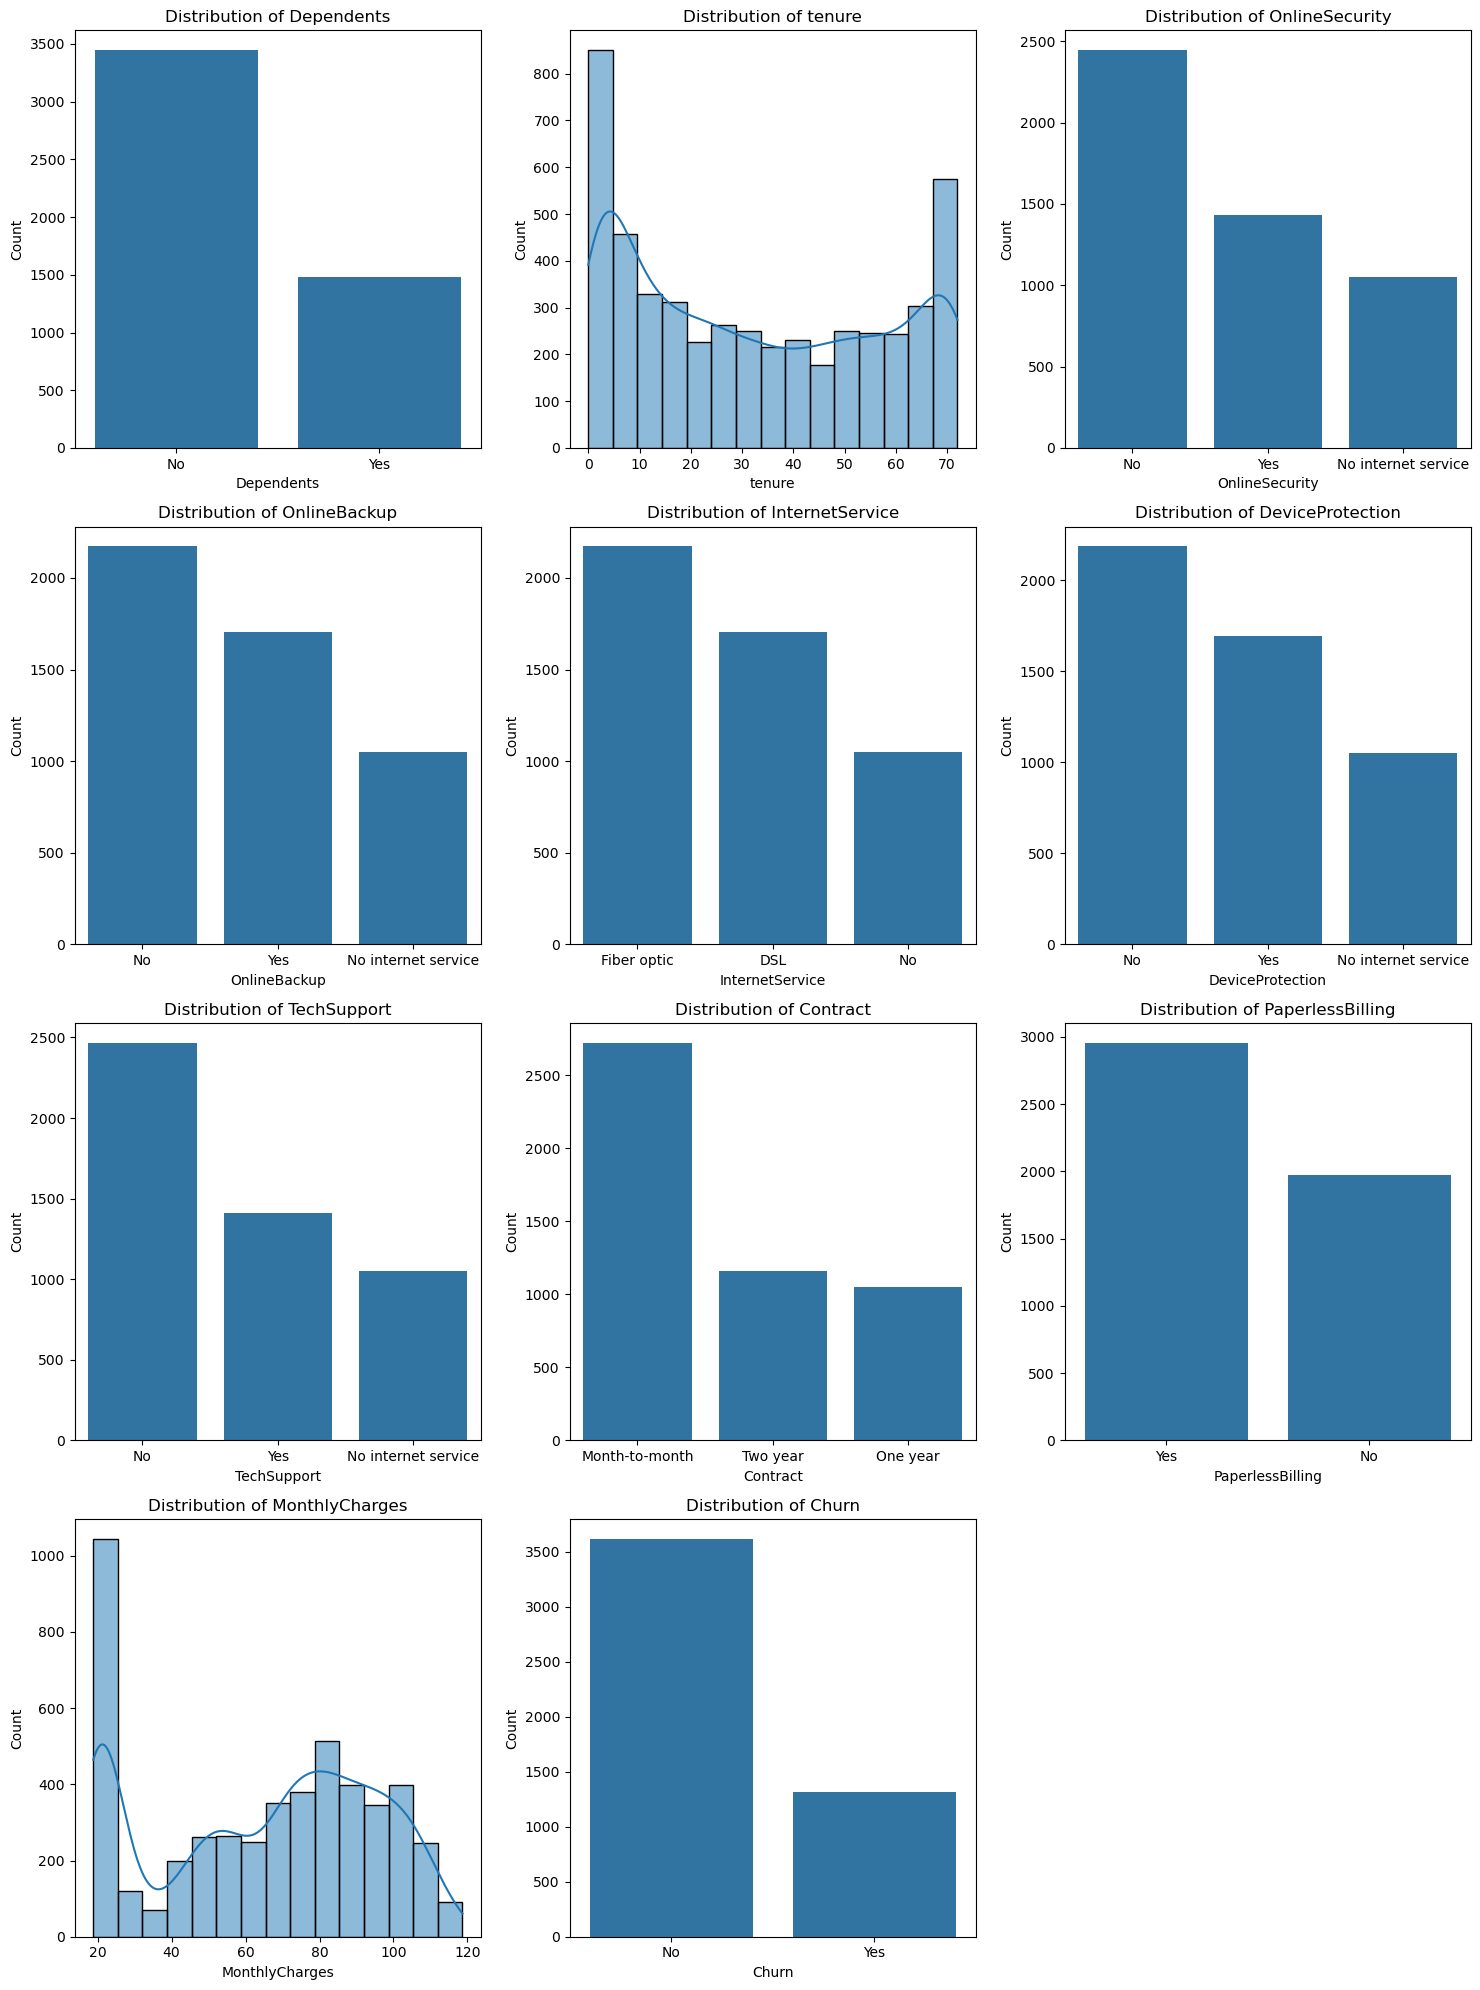

In [47]:
import math
# Set the number of rows and columns for the grid
num_cols = len(df.columns)
rows = math.ceil(num_cols / 3)  # Calculate the required number of rows
cols = 3  # Fixed number of columns

# Create the subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column and plot
for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']:  # For numeric data
        sns.histplot(df[col], bins=15, kde=True, ax=axes[i])
    else:  # For categorical data
        # Aggregate counts for the categorical data
        category_counts = df[col].value_counts().reset_index()
        category_counts.columns = [col, 'Count']

        # Use sns.barplot for custom counts
        sns.barplot(x=col, y='Count', data=category_counts, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if columns < grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

plt.tight_layout()
plt.show()


In [37]:
no_internet=df[df['InternetService']=='No']
no_internet['OnlineSecurity'].value_counts()

OnlineSecurity
No internet service    1052
Name: count, dtype: int64

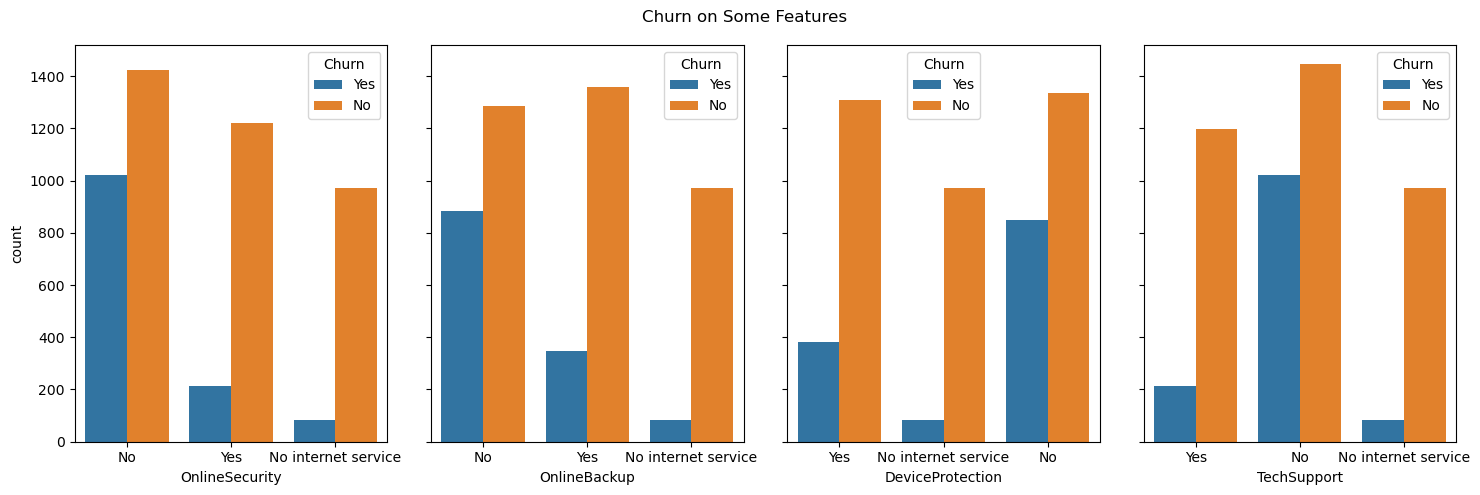

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

# Set the title for the whole figure
plt.suptitle("Churn on Some Features")

# Create the countplots
sns.countplot(x="OnlineSecurity", data=df, hue="Churn", ax=axes[0])
sns.countplot(x="OnlineBackup", data=df, hue="Churn", ax=axes[1])
sns.countplot(x="DeviceProtection", data=df, hue="Churn", ax=axes[2])
sns.countplot(x="TechSupport", data=df, hue="Churn", ax=axes[3])
# Show the plot
plt.tight_layout()
plt.show()

## Data PreProcessing

### Data Cleaning

### Feature Engineering

### Data Scaling

## Declaration Model

### Splitting Data

## Training Model

## Evaluation

## Optimation and Tuning

### Hyperparameter Tuning

### Feature Selection

## Deployment

### Export Model (PKL)